<a href="https://colab.research.google.com/github/hinatanvir/Fault-Detection-SECOM/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import normaltest
import os 
# libraries for plots 
import matplotlib.pyplot as plt
import seaborn as sns
#Libraries for model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [3]:
#Function adding value label to each bar 
def add_value_labels(ax, spacing):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [4]:
path1='https://raw.githubusercontent.com/hinatanvir/Fault-Detection-SECOM/main/secom.data?token=GHSAT0AAAAAABTMJQPCMEYJ4LIGT2V6TRG2YSS5ZWA'

In [5]:
data = pd.read_csv(path1,delimiter=' ',header=None)

In [6]:
path2='https://raw.githubusercontent.com/hinatanvir/Fault-Detection-SECOM/main/secom_labels.data?token=GHSAT0AAAAAABTMJQPCJP4OZMM573LK4Q7UYSS562A'

In [7]:
label=pd.read_csv(path2,delimiter=' ',header=None)

In [8]:
data.columns = ['feature'+str(x+1) for x in range(len(data.columns))]

In [9]:
label.columns=['status','timestamp']

In [10]:
#converting timestamp to datetime format, dayfirst=True arg ensures days and month dont switch 
#for dates lesser than 13 
label['timestamp']=pd.to_datetime(label['timestamp'],dayfirst=True)

In [11]:
# merge the data 
merge_data= pd.concat([data,label],axis=1)

In [ ]:
merge_data.iloc[:,:590]

In [13]:
def eda(df,output):
    #output={}
    for col in df.columns:
        mean=df[col].mean()
        std= df[col].std()
        percent_null= pd.isnull(df[col]).sum()/len(df[col])*100
        unique=len(pd.unique(df[col]))
        outlier_df3= df[(np.abs(stats.zscore(df[col])) > 3)]
        outlier_df2= df[(np.abs(stats.zscore(df[col])) > 2)]
        count_3s_perc=len(outlier_df3)*100/len(df)
        count_2s_perc=(len(outlier_df2)-len(outlier_df3))*100/len(df)
        min= df[col].min()
        q25=df[col].quantile(0.25)
        q50=df[col].quantile(0.5)
        q75=df[col].quantile(0.75)
        max= df[col].max()
        skewness=df[col].skew()
        kurtosis=df[col].kurtosis()
        list = []
        list.append(mean)
        list.append(std)
        list.append(percent_null)
        list.append(unique)
        list.append(count_3s_perc)
        list.append(count_2s_perc)
        list.append(min)
        list.append(q25)
        list.append(q50)
        list.append(q75)
        list.append(max)
        list.append(skewness)
        list.append(kurtosis)
        output[col] = list
    return output;

In [14]:
#dictionary for EDA
result={}
result=eda(data,result)

In [15]:
result1=pd.DataFrame.from_dict(result,orient='index') 

In [16]:
result1.columns=['mean','std', 'percent_null', 'unique', 'count_3s_perc', 'count_2s_perc', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']

In [17]:
result1['count_3s_perc'].value_counts().sort_index()

0.000000    538
0.063816      7
0.191449      3
0.255265      1
0.319081      6
0.382897      6
0.446713     11
0.510530      3
0.638162      2
0.701978      1
0.957243      1
1.084876      1
1.148692      1
1.276324      1
1.531589      1
2.042119      1
3.637524      1
3.828973      2
3.956605      1
4.339502      1
4.467135      1
Name: count_3s_perc, dtype: int64

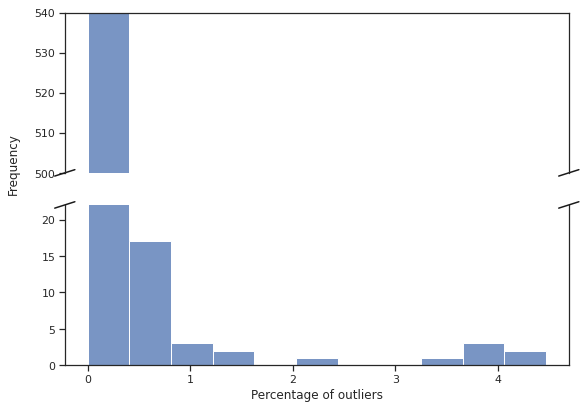

In [29]:
#broken axis bar chart for outlier percentage 
# set style for seaborn plot
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")
# create a color palette (we only have three different colors for the three different tests T1...T3)
pal = sns.color_palette(n_colors=3)
#f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,
#                             sharex=True)
f, (ax1,ax2)= plt.subplots(2,1,sharex = True,sharey=False,figsize=(10, 7))
ax1 = sns.histplot(x="count_3s_perc",
                   data=result1, palette=pal, ax=ax1)
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")
# we basically do the same thing again for the second plot
ax2 = sns.histplot(x="count_3s_perc",
                   data=result1, palette=pal, ax=ax2)

ax1.set_ylim(500, 540)
ax2.set_ylim(0, 22)

# the upper part does not need its own x axis as it shares one with the lower part
ax1.get_xaxis().set_visible(False)

# by default, each part will get its own "Latency in ms" label, but we want to set a common for the whole figure
# first, remove the y label for both subplots
ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("Percentage of outliers")
# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
f.text(0.07, 0.55,"Frequency", va="center", rotation="vertical")

# by default, seaborn also gives each subplot its own legend, which makes no sense at all
# soe remove both default legends first
#ax1.get_legend().remove()
#ax2.get_legend().remove()
# then create a new legend and put it to the side of the figure (also requires trial and error)
#ax2.legend(loc=(1.025, 0.5), title="Design")

# let's put some ticks on the top of the upper part and bottom of the lower part for style
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

# finally, adjust everything a bit to make it prettier (this just moves everything, best to try and iterate)
f.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)

#plt.show()
 #now for the fun part, this is just copied from https://matplotlib.org/examples/pylab_examples/broken_axis.html
# (most of this is, actually)
# here, we create these little diagonal lines that bring this chart to a whole new level:

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpts are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
d = .02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.show()



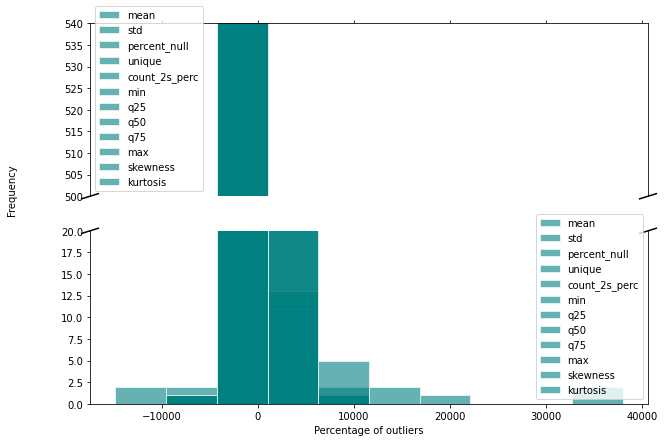

In [21]:
#with matplotlib
fig, (ax,ax2)= plt.subplots(2,1,sharex = True,sharey=False,figsize=(10, 7))

result1.plot.hist(x='count_3s_perc', legend=False, ax=ax,facecolor='teal',edgecolor='white',alpha=0.6)
result1.plot.hist(x='count_3s_perc', legend=False, ax=ax2,facecolor='teal',edgecolor='white',alpha=0.6)

ax.set_ylim(500,540) 
ax2.set_ylim(0,20)

ax.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("Percentage of outliers")
# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
fig.text(0.01, 0.55,"Frequency", va="center", rotation="vertical")

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

Proceeding with analysis on merged data

In [18]:
#frequency count of target variable before splitting# 
pass_fail = merge_data['status'].unique()  # -1,1

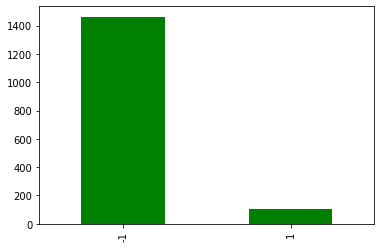

In [19]:
clrs = ['r' if (x == 1) else 'g' for x in merge_data['status'] ]
merge_data['status'].value_counts().plot(kind = 'bar', color=clrs)# 1463 pass , 104 failb

In [1]:
#merge_data['index']=merge_data.index
sns.histplot( merge_data[merge_data.status == -1]['timestamp'], color = 'g');
sns.histplot( merge_data[merge_data.status == 1]['timestamp'], color = 'r');

NameError: ignored

In [ ]:
data_pass=merge_data.loc[merge_data['status']== -1]
data_fail=merge_data.loc[merge_data['status']== 1]

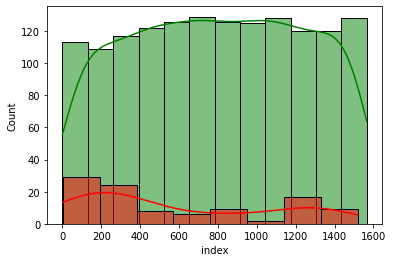

In [ ]:
#sns.frequencyplot( merge_data[merge_data.status == -1]['index'], color = 'g');
#sns.scatterplot( merge_data[merge_data.status == 1]['index'], color = 'r');
sns.histplot(data=merge_data,x=merge_data[merge_data['status'] == -1]['index'],kde=True,color='g')
sns.histplot(data=data_fail,x=merge_data[merge_data['status'] == 1]['index'],kde=True,color='r')

Separate Training and test data 
1. separate the target variable
2. make the splits with equal proportion of target varaible in training and test split
3. check for frequency counts
4. proceed with histograming null values and volatility of training data 

In [ ]:
#data set accoring to pass or fail 
#unique_vals = merge_data['status'].unique()  # [0, 1, 2]
#targets = [merge_data.loc[merge_data['status'] == val] for val in unique_vals]

In [ ]:
merge_data

In [ ]:
#separate target variable and remaining data
x = merge_data.iloc[:,:590]
y = merge_data.iloc[:,590]

In [ ]:
y

In [ ]:
# splitting merge_data into train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1,stratify=y)# random state = fix the random generator (same data all time)
#startify preserves the same proportions of examples in each class as observed in the original dataset- imbalance data .

In [ ]:
#frequency count of target varaible in training and test data separately (after splitting)
#x_train - 1253.590
#x_test - 314.590
#y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

-1    0.933121
 1    0.066879
Name: status, dtype: float64

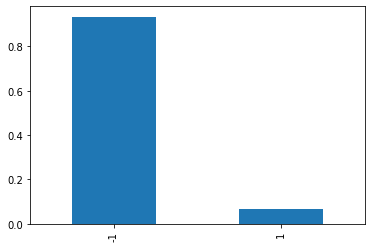

In [ ]:
y_train.value_counts(normalize=True).plot(kind='bar')

In [ ]:
y_train=y_train.to_frame()

In [ ]:
y_train['index']=y_train.index

In [ ]:
y_train

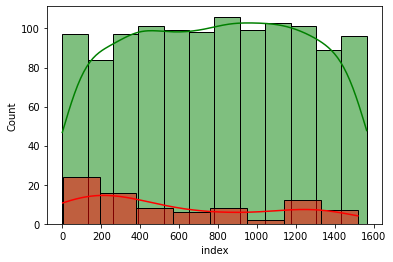

In [ ]:
sns.histplot(data=y_train,x=y_train[y_train['status'] == -1]['index'],kde=True,color='g')
sns.histplot(data=y_train,x=y_train[y_train['status'] == 1]['index'],kde=True,color='r')

In [ ]:
x_train

In [ ]:
##proceeding with only training data 
#analysis of volatility and null values of training data 
#xtrain_desc = x_train.describe()
xtrain_eda={}
xtrain_eda=eda(x_train,xtrain_eda)

In [ ]:
xtrain_eda1=pd.DataFrame.from_dict(xtrain_eda,orient='index')

In [ ]:
xtrain_eda1.columns=['mean','std', 'percent_null', 'unique', 'count_3s', 'count_2s', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']

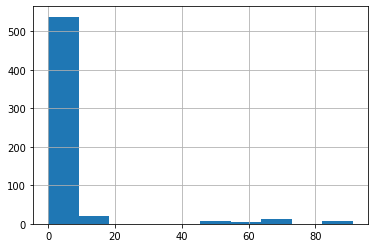

In [ ]:
#Percent_null of features before split 
#sns.histplot(data=result1, x='percent_null',bins=20, kde=True)
result1['percent_null'].hist()

Before split and after split the trend of missing percent values are same
important thresholds:
- big jump from 17% to 45%
- after 45% , more number of columns show 65% null values , therefore threshold should be between 55% to 65%

In [ ]:
result1.percent_null.value_counts().sort_index()

In [ ]:
xtrain_eda1.percent_null.value_counts().sort_index()

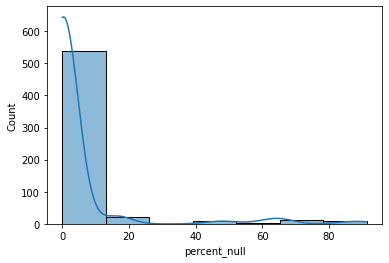

In [ ]:
sns.histplot(data=xtrain_eda1, x='percent_null',bins=7, kde=True)

plotting scaled std before and after split 

In [ ]:
scaler = MinMaxScaler()
#It seems like the Scaler works only with series. When we scale the whole dataframe, the datafram will be broken down.
#Then we need to form the dataframe again.

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled

In [ ]:
data_scaled_desc=data_scaled.describe().T

In [ ]:
data_scaled_desc

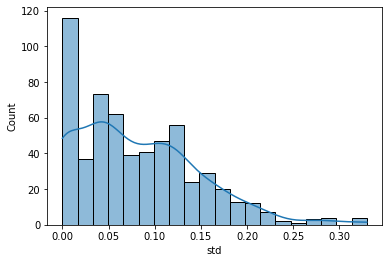

In [ ]:
sns.histplot(data=data_scaled_desc, x='std',bins=20, kde=True)

In [ ]:
data_scaled_desc['std'].value_counts().sort_index()

In [ ]:
xtrain_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
xtrain_scaled

In [ ]:
xtrain_scaled_desc=xtrain_scaled.describe().T

In [ ]:
xtrain_scaled_desc['std'].value_counts().sort_index()

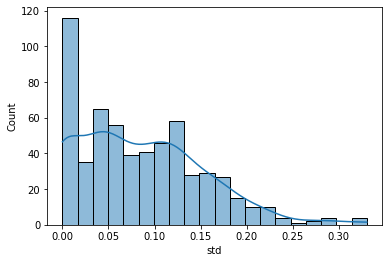

In [ ]:
sns.histplot(data=xtrain_scaled_desc, x='std',bins=20, kde=True)

In [ ]:
tranform=result1.copy(deep=True)

In [ ]:
tranform['std'].value_counts()

In [ ]:
std_counts.plot(kind="hist")

In [ ]:
tranform['unique'].value_counts()

In [ ]:
#bins = [0, 25, 50, 75, 100]
#labels =[1,2,3,4]
#pd.cut(df1['Score'], bins,labels=labels)
bins_null=[0,1,5,20,55,75,95]
labels_null=['<=1','1-5','5 -20','20-55','55-75','75-95']
tranform['null_bin']= pd.cut(tranform['percent_null'], bins_null,labels=labels_null,right=True)

In [ ]:
bins_unique=[0,2,10,100,500,np.inf] # np.inf for greater than 500
labels_unique=['>=2','2-10','10-100','100-500','>500']
tranform['unique_bin']= pd.cut(tranform['unique'], bins_unique,labels=labels_unique,right=True)

In [ ]:
bins_3s=[0,1,11,31,51,71] 
labels_3s=['<1','1-10','11-30','31-50','51-70']
tranform['3s_bin']= pd.cut(tranform['count_3s'], bins_3s,labels=labels_3s,right=False)

In [ ]:
tranform['count_3s'].value_counts()

In [ ]:
tranform['count_2s'].value_counts()

In [ ]:
bins_2s=[0,1,11,31,51,71,np.inf] 
labels_2s=['<1','1-10','11-30','31-50','51-70','>70']
tranform['2s_bin']= pd.cut(tranform['count_2s'], bins_2s,labels=labels_2s,right=False)

In [ ]:
skew_bin=[-np.inf,-1,0,np.inf]
labels_skew=['left_skewed','normal or slightly skewed','right skewed']
tranform['skew_bin']= pd.cut(tranform['skewness'], skew_bin,labels=labels_skew,right=False)

In [ ]:
null_counts= tranform['null_bin'].value_counts().sort_index()# sort_index to sort the left column of rows 
#pd.crosstab(index=tranform["null_bin"], columns="count")
null_counts

<=1      435
1-5       51
5 -20     20
20-55      8
55-75     16
75-95      8
Name: null_bin, dtype: int64

In [ ]:
unique_counts=tranform['unique_bin'].value_counts().sort_index()
unique_counts

In [ ]:
bin3s_count=tranform['3s_bin'].value_counts().sort_index()
bin3s_count

In [ ]:
bin2s_count=tranform['2s_bin'].value_counts().sort_index()
bin2s_count

In [ ]:
skew_counts=tranform['skew_bin'].value_counts().sort_index()

In [ ]:
skew_counts

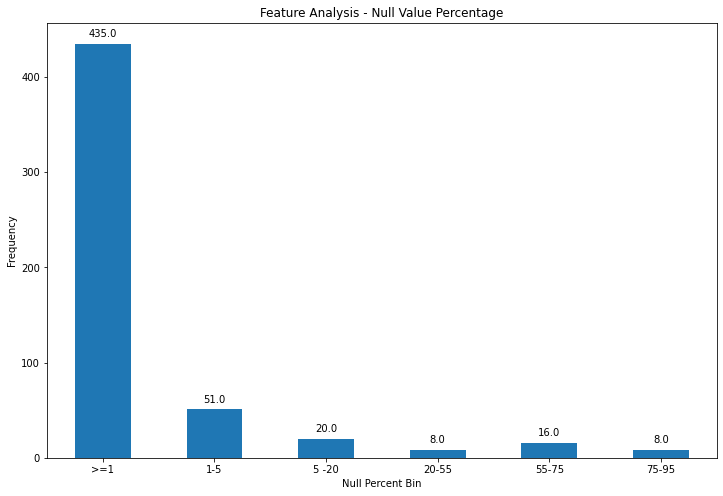

In [ ]:
plt.figure(figsize=(12, 8))
# bar Graph for Null value categories 
ax = null_counts.plot(kind="bar")
ax.set_title('Feature Analysis - Null Value Percentage')
ax.set_xlabel('Null Percent Bin')
ax.set_ylabel('Frequency')
ax.set_xticklabels(labels_null,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(ax,5)
plt.show()

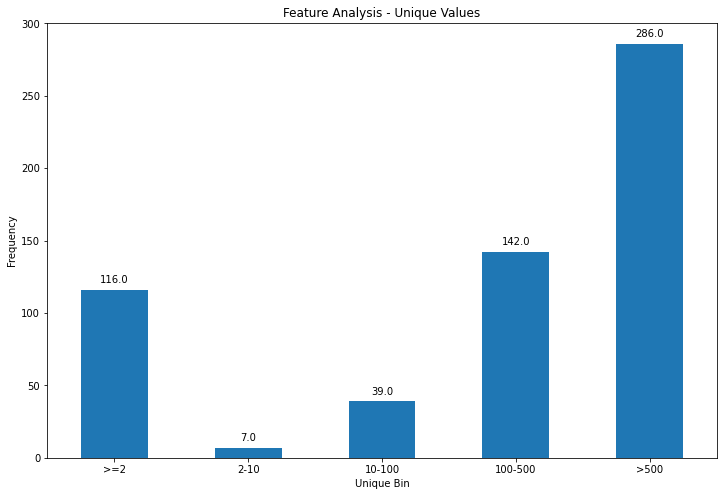

In [ ]:
plt.figure(figsize=(12, 8))
# bar Graph for unique value categories 
ux = unique_counts.plot(kind="bar")
ux.set_title('Feature Analysis - Unique Values')
ux.set_xlabel('Unique Bin')
ux.set_ylabel('Frequency')
ux.set_xticklabels(labels_unique,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(ux,5)
plt.show()

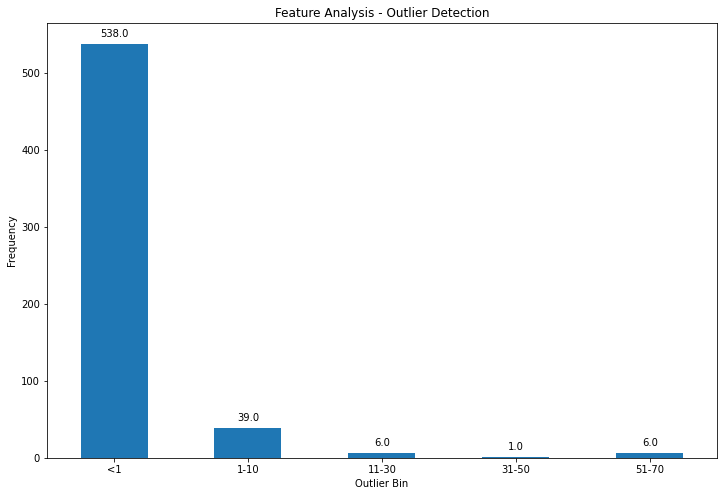

In [ ]:
plt.figure(figsize=(12, 8))
# bar Graph for unique value categories 
outx = bin3s_count.plot(kind="bar")
outx.set_title('Feature Analysis - Outlier Detection')
outx.set_xlabel('Outlier Bin')
outx.set_ylabel('Frequency')
outx.set_xticklabels(labels_3s,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(outx,5)
plt.show()

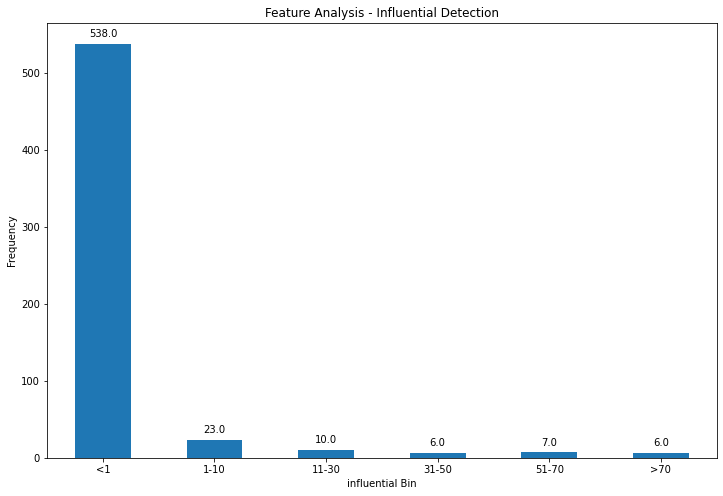

In [ ]:
plt.figure(figsize=(12, 8))
# bar Graph for unique value categories 
infx = bin2s_count.plot(kind="bar")
infx.set_title('Feature Analysis - Influential Detection')
infx.set_xlabel('influential Bin')
infx.set_ylabel('Frequency')
infx.set_xticklabels(labels_2s,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(infx,5)
plt.show()

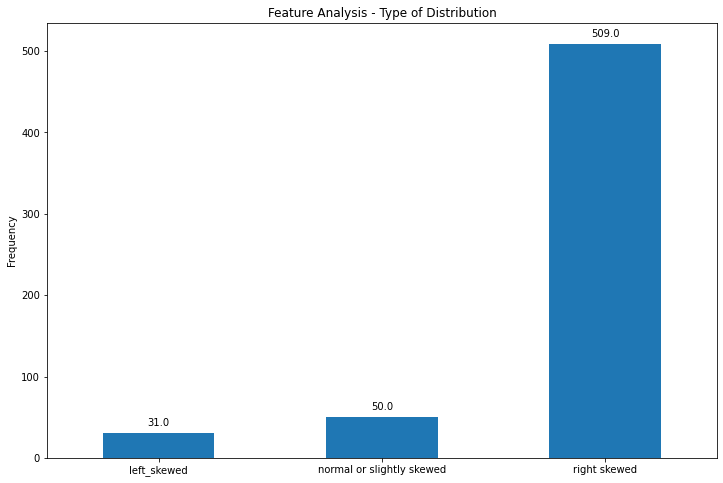

In [ ]:
plt.figure(figsize=(12, 8))
# bar Graph for Null value categories 
skx = skew_counts.plot(kind="bar")
skx.set_title('Feature Analysis - Type of Distribution')
#skx.set_xlabel('Distribution Type')
skx.set_ylabel('Frequency')
skx.set_xticklabels(labels_skew,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(skx,5)
plt.show()

In [ ]:
plt.savefig("Percent_null.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
#result1[result1['count_3s'] > 0] # 52 features with outliers
#result1[result1['unique'] < 4] # 122 , 116 features only 2 unique values
#len(result1[result1['percent_null'] > 55]) # 24 features with null values greater than 55%

Creating box plots for skewness 

In [ ]:
data_secom=pd.melt(data)

In [ ]:
data_secom

In [ ]:
sns.heatmap(data.corr())

In [ ]:
#onlytest normality tests 
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
rand = 5 * randn(100) + 50
# normality test
stat, p = normaltest(rand)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
import scipy.stats as st
seed(42)

In [ ]:
from scipy.stats import normaltest
alpha = 0.05

In [ ]:
test= data.apply(normaltest,nan_policy='omit')

In [ ]:
test=test.transpose()

In [ ]:
test.columns= ['stat', 'p']

In [ ]:
test[test['p']>alpha]

,stat,p
feature9,4.485891,0.106145
feature49,1.669308,0.434025
feature84,1.672086,0.433422
feature85,5.204714,0.074099
feature320,2.778687,0.249239


In [ ]:
from scipy.stats import shapiro